
# Семинар 5

Исследуем зависимость положения разделяющей гиперплоскости в методе опорных векторов в зависимости от значения гиперпараметра $C$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

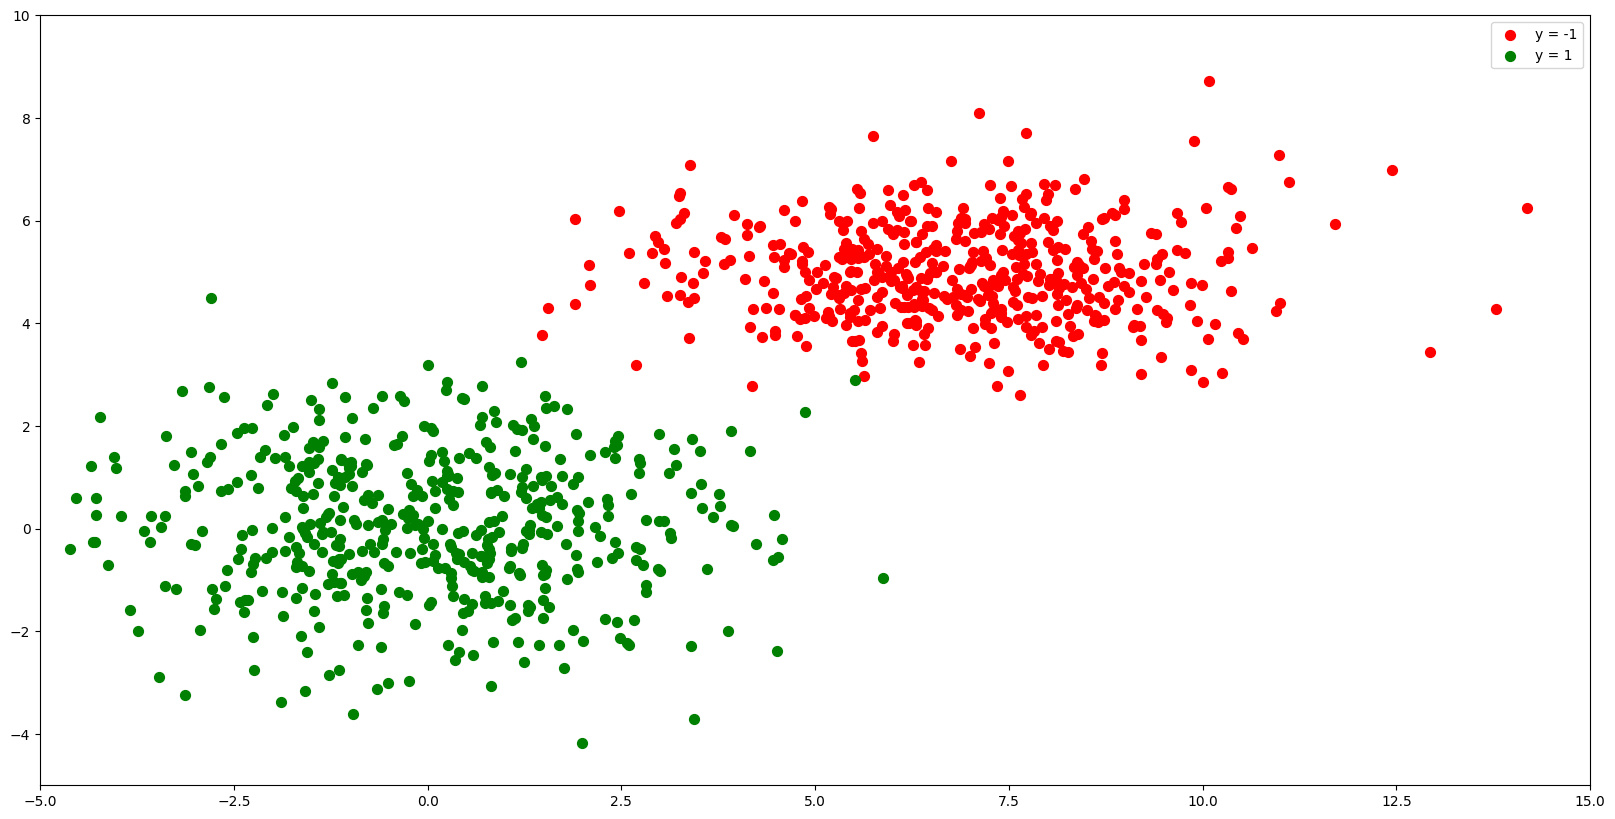

In [2]:
class_size=500

plt.figure(figsize=(20,10))
mean0 = [7, 5]
cov0 = [[4, 0], [0, 1]]
mean1 = [0, 0]
cov1 = [[4, 0], [0, 2]]
data0 = np.random.multivariate_normal(mean0, cov0, class_size)
data1 = np.random.multivariate_normal(mean1, cov1, class_size)
data = np.vstack((data0, data1))
y = np.hstack((-np.ones(class_size), np.ones(class_size)))

plt.scatter(data0[:, 0], data0[:, 1], c='red', s=50)
plt.scatter(data1[:, 0], data1[:, 1], c='green', s=50)
plt.legend(['y = -1', 'y = 1'])
axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
plt.show()

In [3]:
from sklearn.svm import SVC

SVM_classifier = SVC(C=0.01, kernel='linear')
SVM_classifier.fit(data, y)

SVC(C=0.01, kernel='linear')

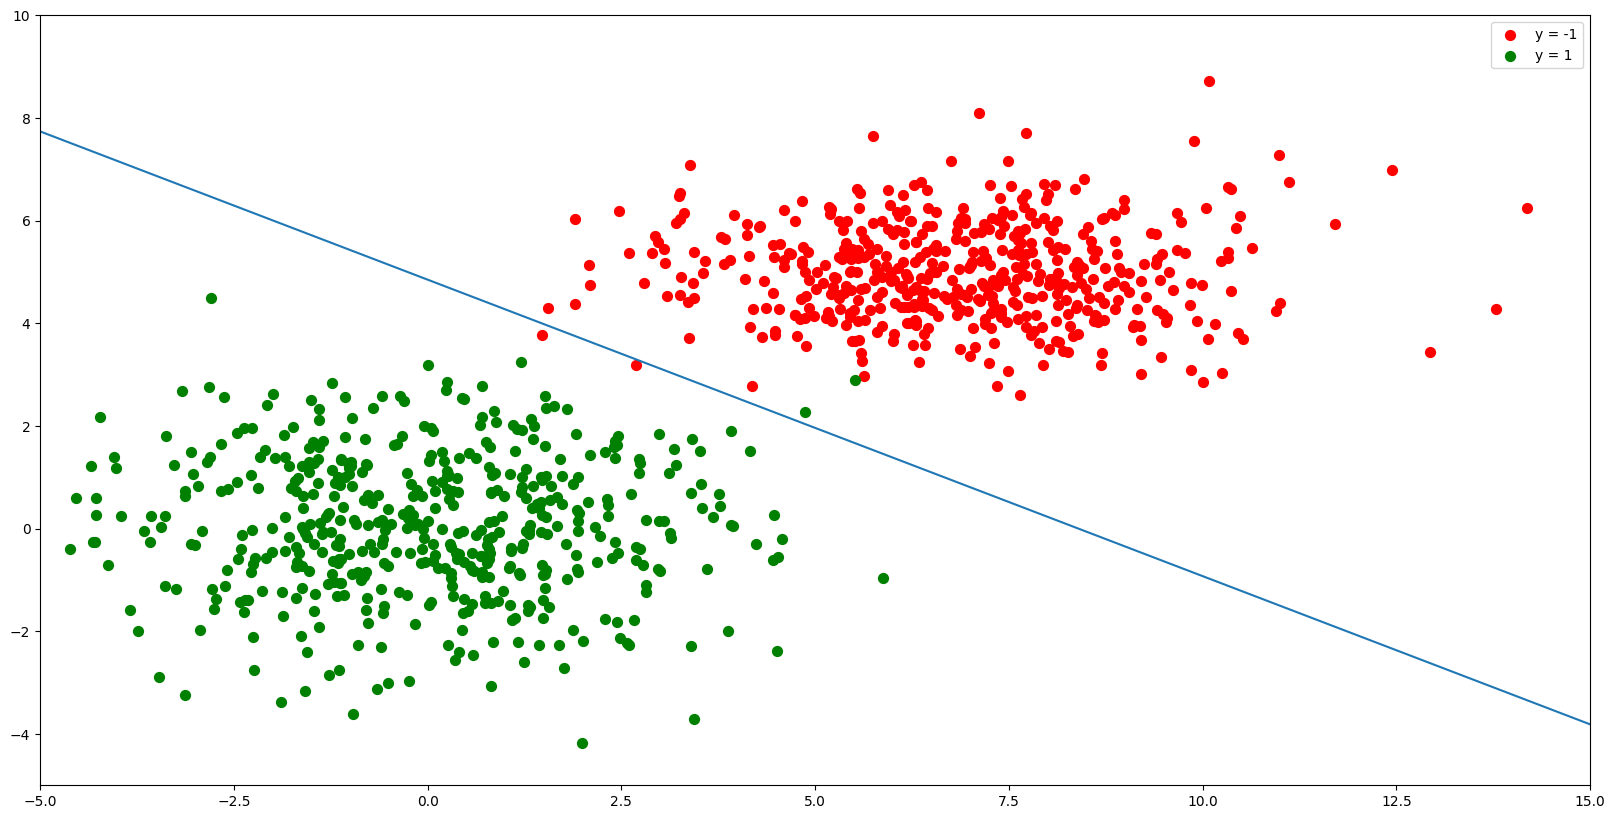

In [4]:
w_1 = SVM_classifier.coef_[0][0]
w_2 = SVM_classifier.coef_[0][1]
w_0 = SVM_classifier.intercept_[0]


plt.figure(figsize=(20,10))
plt.scatter(data0[:, 0], data0[:, 1], c='red', s=50)
plt.scatter(data1[:, 0], data1[:, 1], c='green', s=50)
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-10, 15, 3000)
plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
plt.show()

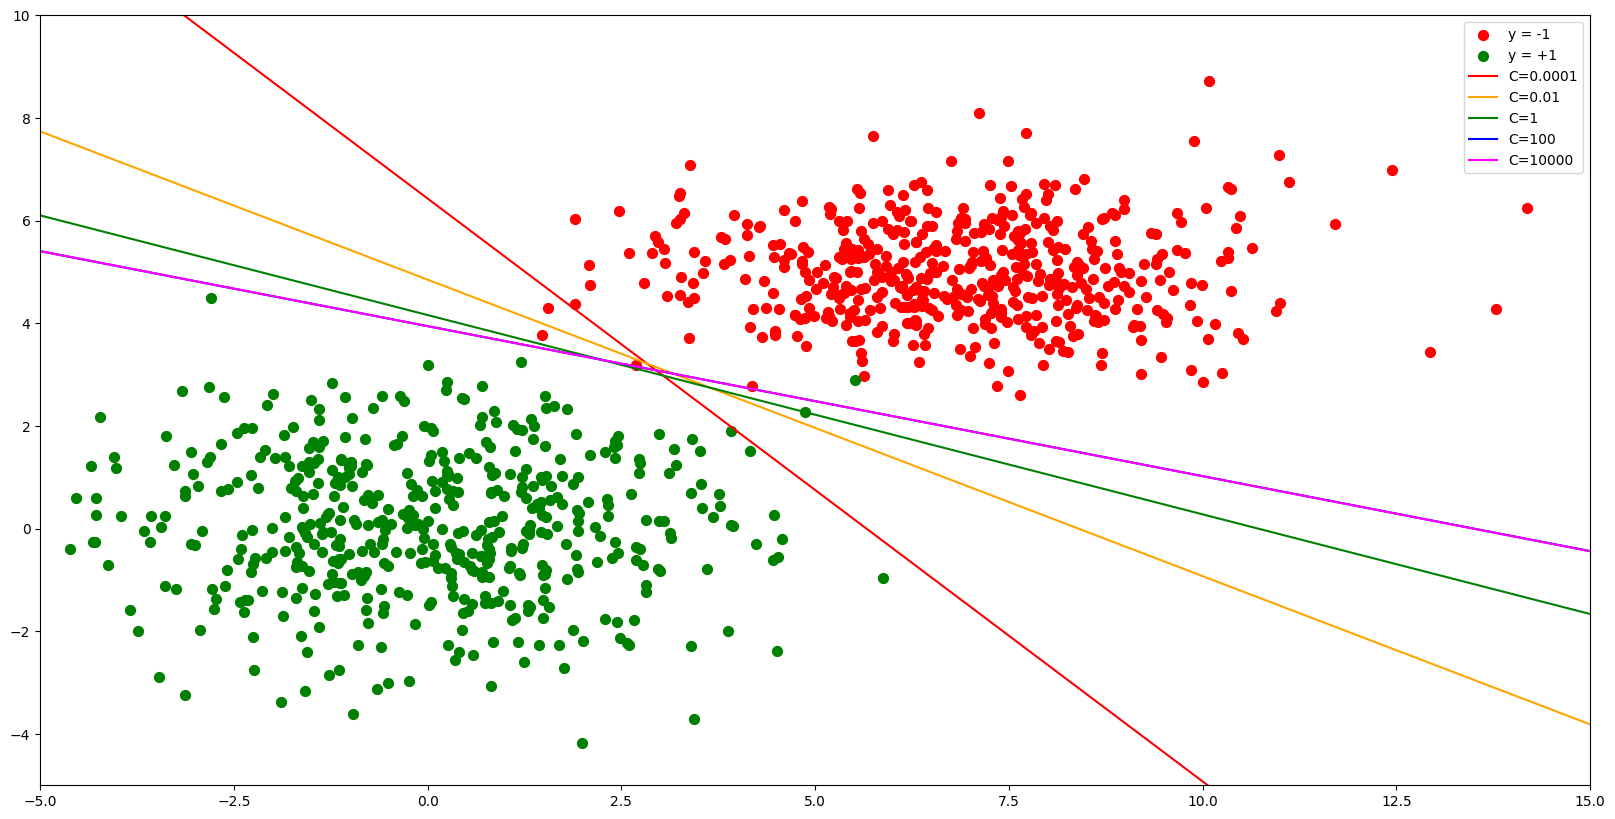

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(data0[:, 0], data0[:, 1], c='red', s=50, label='y = -1')
plt.scatter(data1[:, 0], data1[:, 1], c='green', s=50, label='y = +1')
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-10, 15, 3000)
colors = ['red', 'orange', 'green', 'blue', 'magenta']

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    SVM_classifier = SVC(C=C, kernel='linear')
    SVM_classifier.fit(data, y)
    w_1 = SVM_classifier.coef_[0][0]
    w_2 = SVM_classifier.coef_[0][1]
    w_0 = SVM_classifier.intercept_[0]
    plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2, color=colors[i], label='C='+str(C))

axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
plt.legend(loc=0)
plt.show()

Гиперпараметр $C$ отвечает за то, что является более приоритетным для классификатора, — "подгонка" под обучающую выборку или максимизация ширины разделяющей полосы.
 - При больших значениях $C$ классификатор сильно настраивается на обучение, тем самым сужая разделяющую полосу.
 - При маленьких значениях $C$ классификатор расширяет разделяющую полосу, при этом допуская ошибки на некоторых объектах обучающей выборки.

**Теоретическое домашнее задание №4**

---




Задача 1. Пусть даны выборка X, состоящая из 8 объектов, и классификатор b(x),
предсказывающий оценку принадлежности объекта положительному классу. Предсказания b(x) и реальные метки объектов приведены ниже:

b(x1) = 0.1, y1 = +1,

b(x2) = 0.8, y2 = +1,

b(x3) = 0.2, y3 = −1,

b(x4) = 0.25, y4 = −1,

b(x5) = 0.9, y5 = +1,

b(x6) = 0.3, y6 = +1,

b(x7) = 0.6, y7 = −1,

b(x8) = 0.95, y8 = +1.

Постройте ROC-кривую и вычислите AUC-ROC для множества классификаторов a(x;t), порожденных b(x), на выборке X.

AUC-ROC: 0.733


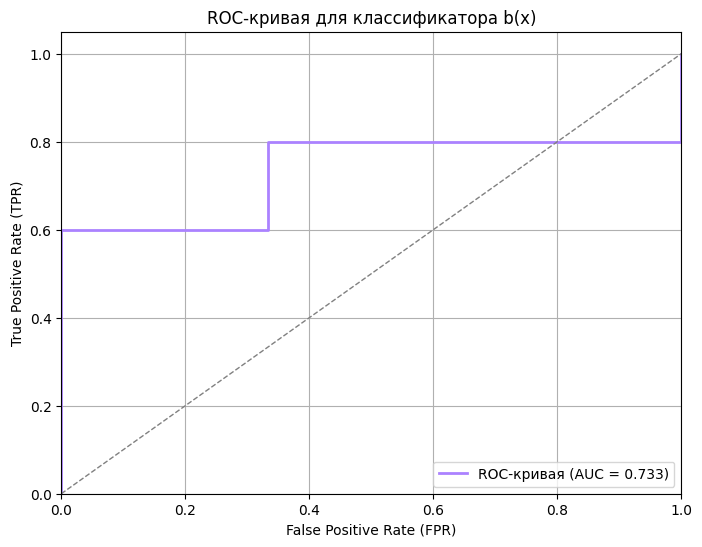


Пороги, FPR и TPR:
----------------------
Порог (t) | FPR    | TPR    
----------------------
inf    | 0.000 | 0.000
0.950    | 0.000 | 0.200
0.800    | 0.000 | 0.600
0.600    | 0.333 | 0.600
0.300    | 0.333 | 0.800
0.200    | 1.000 | 0.800
0.100    | 1.000 | 1.000
FPR: [0.         0.         0.         0.33333333 0.33333333 1.
 1.        ]
TPR: [0.  0.2 0.6 0.6 0.8 0.8 1. ]
Thresholds: [ inf 0.95 0.8  0.6  0.3  0.2  0.1 ]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# предсказанные оценки b(x) и реальные метки y
b_x = np.array([0.1, 0.8, 0.2, 0.25, 0.9, 0.3, 0.6, 0.95])
y_true = np.array([1, 1, -1, -1, 1, 1, -1, 1])  # +1 → 1, -1 → 0 (для sklearn)

# преобразуем метки: +1 → 1, -1 → 0 (так как sklearn ожидает бинарные метки 0 и 1)
y_true_binary = np.where(y_true == 1, 1, 0)

# вычисляем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_true_binary, b_x)

# вычисляем AUC-ROC
roc_auc = auc(fpr, tpr)

# выводим AUC-ROC
print(f"AUC-ROC: {roc_auc:.3f}")

# построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#AB82FF', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для классификатора b(x)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# вывод таблицы с порогами, FPR и TPR
print("\nПороги, FPR и TPR:")
print("----------------------")
print("Порог (t) | FPR    | TPR    ")
print("----------------------")
for t, fp, tp in zip(thresholds, fpr, tpr):
    print(f"{t:.3f}    | {fp:.3f} | {tp:.3f}")

print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)

Задача 2. Пусть дан классификатор b(x), который возвращает оценку принадлежности объекта x классу +1. Отсортируем все объекты по неубыванию ответа
классификатора b: x(1), . . . , x(`)
. Обозначим истинные ответы на этих объектах через
y(1), . . . , y(`)
.
Покажите, что AUC-ROC для данной выборки будет равен вероятности того,
что случайно выбранный положительный объект окажется в отсортированном списке
не раньше случайно выбранного отрицательного объекта.


In [7]:
import numpy as np
from sklearn.metrics import roc_auc_score

# данные из задачи 1 (предсказания и метки)
b_x = np.array([0.1, 0.8, 0.2, 0.25, 0.9, 0.3, 0.6, 0.95])
y_true = np.array([1, 1, -1, -1, 1, 1, -1, 1])  # +1 → 1, -1 → 0

# преобразуем метки для sklearn (1 и 0)
y_true_binary = np.where(y_true == 1, 1, 0)

# вычисляем AUC-ROC стандартным способом
auc_roc = roc_auc_score(y_true_binary, b_x)
print(f"AUC-ROC (стандартный расчет): {auc_roc:.3f}")

# вычисляем AUC-ROC как вероятность P(b(x+) >= b(x-))
def manual_auc_roc(b_x, y_true):
    positive = b_x[y_true == 1]
    negative = b_x[y_true == -1]
    count = 0
    total_pairs = len(positive) * len(negative)

    for p in positive:
        for n in negative:
            if p >= n:
                count += 1
    return count / total_pairs

manual_auc = manual_auc_roc(b_x, y_true)
print(f"AUC-ROC (ручной расчет): {manual_auc:.3f}")

# проверяем, что результаты совпадают
assert np.isclose(auc_roc, manual_auc), "Результаты не совпадают!"
print("Результаты совпадают!")

AUC-ROC (стандартный расчет): 0.733
AUC-ROC (ручной расчет): 0.733
Результаты совпадают!


Задача 3. Позволяет ли предсказывать корректные вероятности экспоненциальная
функция потерь L(y, z) = exp(−yz)?

ОТВЕТ

Нет, экспоненциальная функция потерь
L
(
y
,
z
)
=
exp
⁡
(
−
y
z
)
L(y,z)=exp(−yz) не позволяет предсказывать корректные вероятности принадлежности к классам.

Подробное объяснение:
1. Что такое "корректные вероятности"?
Корректные (калиброванные) вероятности означают, что:

Если модель предсказывает
P
(
y
=
+
1
∣
x
)
=
0.7
P(y=+1∣x)=0.7, то в 70% случаев объект
x
x действительно должен принадлежать классу
+
1
+1.

Для этого функция потерь должна быть сопряженной (proper scoring rule) к вероятностям, например, как логистическая потеря (log loss).

2. Проблема экспоненциальной потери:
Экспоненциальная потеря
L
(
y
,
z
)
=
exp
⁡
(
−
y
z
)
L(y,z)=exp(−yz) используется в алгоритме AdaBoost.

Она не минимизируется предсказаниями в виде вероятностей
P
(
y
=
+
1
∣
x
)
P(y=+1∣x).

Вместо этого она стремится к детерминированным ответам (близким к
+
∞
+∞ или
−
∞
−∞), что несовместимо с вероятностной интерпретацией.

In [8]:
import numpy as np
from scipy.optimize import minimize

# истинная вероятность P(y=+1|x)
p_true = 0.7

# оптимизация экспоненциальной потери
def exp_loss(z):
    return p_true * np.exp(-z) + (1 - p_true) * np.exp(z)

result = minimize(exp_loss, x0=0.0)
z_optimal = result.x[0]
print(f"Оптимальный z для экспоненциальной потери: {z_optimal:.3f}")  # ≈ 0.423

# преобразуем z в "вероятность" (сигмоида)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print(f"P(y=+1|x) = {sigmoid(z_optimal):.3f}")  # ≈ 0.604 ≠ 0.7!

Оптимальный z для экспоненциальной потери: 0.424
P(y=+1|x) = 0.604


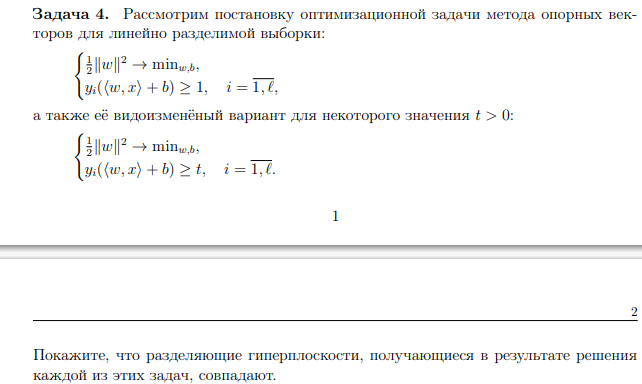

     pcost       dcost       gap    pres   dres
 0:  4.9570e-02  8.9970e+00  9e+01  2e+00  2e+02
 1:  3.6840e-01 -9.1789e+00  1e+01  3e-01  3e+01
 2:  5.0357e-01  2.2992e-02  5e-01  3e-03  3e-01
 3:  3.5042e-01  2.7921e-01  7e-02  4e-04  3e-02
 4:  3.4625e-01  3.3565e-01  1e-02  3e-05  3e-03
 5:  3.4461e-01  3.4440e-01  2e-04  6e-07  6e-05
 6:  3.4458e-01  3.4458e-01  2e-06  6e-09  6e-07
 7:  3.4458e-01  3.4458e-01  2e-08  6e-11  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9828e-01  2.8385e+01  2e+02  1e+00  2e+02
 1:  9.6747e-01 -1.6587e+01  3e+01  3e-01  5e+01
 2:  1.5529e+00 -1.8165e+00  4e+00  2e-02  4e+00
 3:  1.4085e+00  1.2626e+00  1e-01  5e-16  1e-15
 4:  1.3799e+00  1.3719e+00  8e-03  4e-16  8e-16
 5:  1.3783e+00  1.3783e+00  8e-05  5e-16  9e-16
 6:  1.3783e+00  1.3783e+00  8e-07  5e-16  1e-15
Optimal solution found.
Проверка масштабирования:
w1 / t = [0.26144154 0.32231434]
w2 = [1.04576637 1.28925731]
b1 / t = 0.007284709224237791
b2 

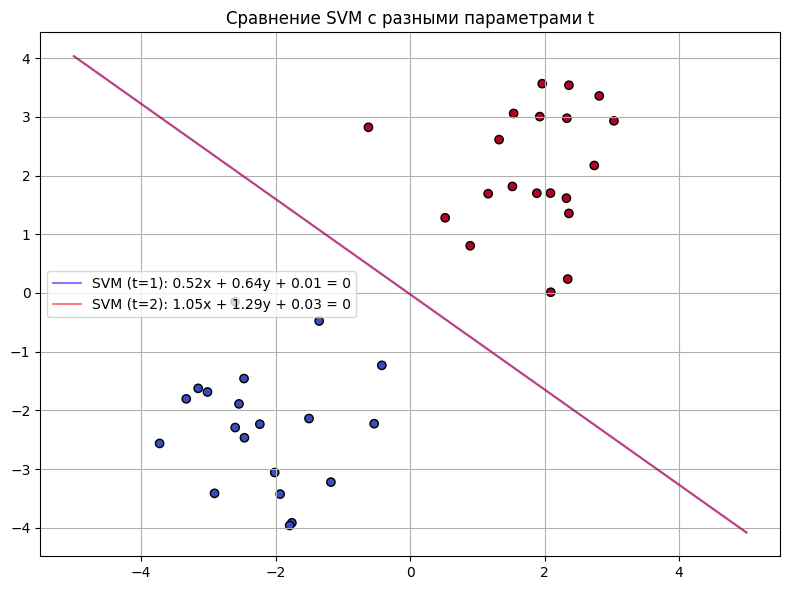

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# генерируем линейно разделимые данные
np.random.seed(42)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = np.array([-1]*20 + [1]*20)

# функция для решения SVM с произвольным параметром t
def solve_svm(X, y, t=1.0):
    n_samples, n_features = X.shape

    # матрицы для квадратичного программирования
    P = matrix(np.eye(n_features + 1))  # +1 для b
    q = matrix(np.zeros(n_features + 1))

    # ограничения y_i(w·x_i + b) >= t
    G = matrix(-np.column_stack([y[:, np.newaxis] * X, y]))
    h = matrix(-t * np.ones(n_samples))

    # решаем задачу оптимизации
    solution = solvers.qp(P, q, G, h)
    w_b = np.array(solution['x']).flatten()
    return w_b[:-1], w_b[-1]

# решаем для стандартной задачи (t=1)
w1, b1 = solve_svm(X, y, t=1.0)

# решаем для модифицированной задачи (t=2)
w2, b2 = solve_svm(X, y, t=2.0)

# проверяем соотношение w2 = w1/t, b2 = b1/t
print("Проверка масштабирования:")
print(f"w1 / t = {w1/2}")
print(f"w2 = {w2}")
print(f"b1 / t = {b1/2}")
print(f"b2 = {b2}")

# создаем график
plt.figure(figsize=(8, 6))

# отображаем точки данных
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')

# рисуем обе разделяющие линии с прозрачностью 50%
x_plot = np.linspace(-5, 5, 100)
plt.plot(x_plot, (-w1[0]*x_plot - b1)/w1[1], 'b-', alpha=0.5,
         label=f'SVM (t=1): {w1[0]:.2f}x + {w1[1]:.2f}y + {b1:.2f} = 0')
plt.plot(x_plot, (-w2[0]*x_plot - b2)/w2[1], 'r-', alpha=0.5,
         label=f'SVM (t=2): {w2[0]:.2f}x + {w2[1]:.2f}y + {b2:.2f} = 0')

plt.title('Сравнение SVM с разными параметрами t')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

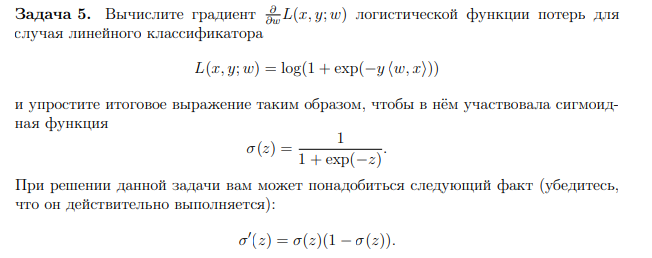

In [10]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss_gradient(x, y, w):
    z = np.dot(w, x)
    sigma = sigmoid(y * z)
    return -y * (1 - sigma) * x

# пример данных
x = np.array([1.5, -2.0])
y = 1
w = np.array([0.5, -0.5])

# численная проверка градиента
epsilon = 1e-6
numerical_gradient = np.zeros_like(w)
for i in range(len(w)):
    w_plus = w.copy()
    w_plus[i] += epsilon
    w_minus = w.copy()
    w_minus[i] -= epsilon
    numerical_gradient[i] = (np.log(1 + np.exp(-y * np.dot(w_plus, x))) -
                           np.log(1 + np.exp(-y * np.dot(w_minus, x)))) / (2 * epsilon)

# аналитический градиент
analytical_gradient = logistic_loss_gradient(x, y, w)

print("Численный градиент:", numerical_gradient)
print("Аналитический градиент:", analytical_gradient)
print("Разница:", np.linalg.norm(numerical_gradient - analytical_gradient))

Численный градиент: [-0.2220708  0.2960944]
Аналитический градиент: [-0.2220708  0.2960944]
Разница: 8.986041772788074e-11


Задача 6. Ответьте на следующие вопросы:
1. Почему в общем случае распределение p(y|x) для некоторого объекта x ∈ X
отличается от вырожденного?
2. Каким важным с точки зрения задачи классификации преимуществом обладает
логистическая функция потерь?
3. Почему логистическая регрессия позволяет предсказывать корректные вероятности принадлежности объекта классам?
4. Рассмотрим оптимизационную задачу hard-margin SVM. Всегда ли в обучающей выборке существует объект xi
, для которого выполнено yi(hw, xii + b) = 1?
Почему?
5. С какой целью в постановке оптимизационной задачи soft-margin SVM вводятся
переменные ξi
, i = 1, `?

1. Почему распределение
p
(
y
∣
x
)
p(y∣x) отличается от вырожденного?
Ответ:

Вырожденное распределение предполагает, что объект
x
x всегда принадлежит одному классу (например,
p
(
y
=
+
1
∣
x
)
=
1
p(y=+1∣x)=1). В реальности:

Данные могут быть зашумлены.

Признаки
x
x могут быть недостаточно информативными для однозначной классификации.

Классы могут перекрываться в пространстве признаков.

Пример:
Для объекта на границе между классами
p
(
y
=
+
1
∣
x
)
≈
0.5
p(y=+1∣x)≈0.5, что не является вырожденным распределением.




...
2. Преимущество логистической функции потерь для классификации
Ответ:


Логистическая потеря (log loss)
L
=
−
log
⁡
p
(
y
∣
x
)
L=−logp(y∣x):

Калибрует вероятности: минимизация log loss приводит к корректным оценкам
p
(
y
∣
x
)
p(y∣x).

Штрафует за уверенность в ошибке: чем больше модель ошибается, тем выше потери (например, при
p
(
y
=
+
1
∣
x
)
≈
0
p(y=+1∣x)≈0 для
y
=
+
1
y=+1, потеря стремится к
+
∞
+∞).

Сравнение:
В отличие от hinge loss (SVM), log loss дает интерпретируемые вероятности, что полезно для задач, требующих оценки неопределённости (например, медицина).

...
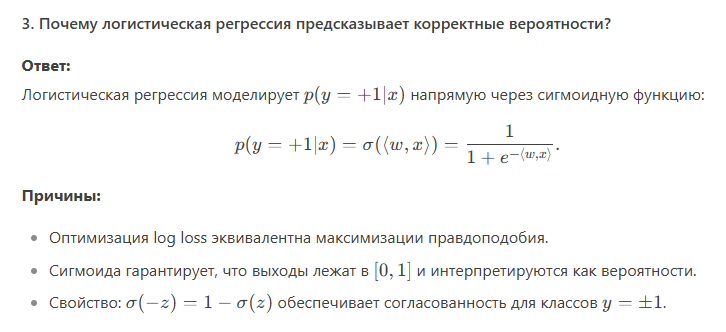


...


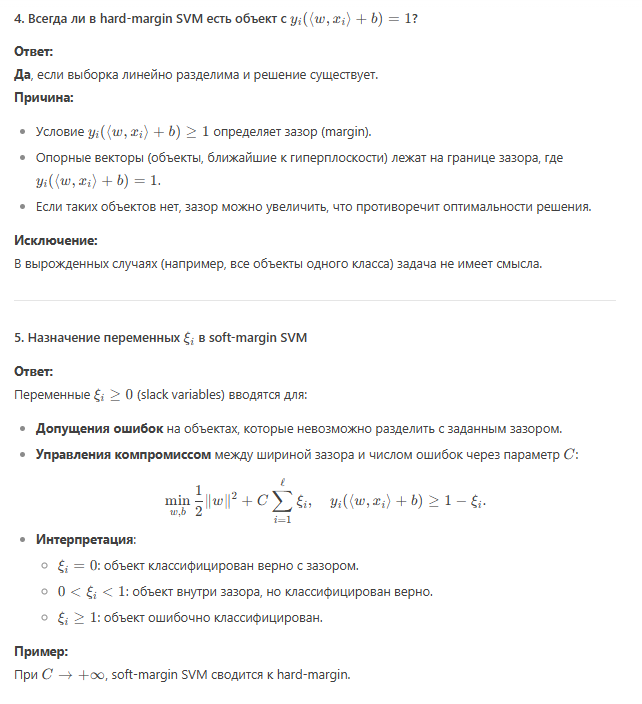